In [1]:
from langchain_community.graphs import Neo4jGraph
from dotenv import load_dotenv
import os

In [2]:
load_dotenv('.env', override=True)
NEO4J_URI = os.getenv('NEO4J_URI')
NEO4J_USERNAME = os.getenv('NEO4J_USERNAME')
NEO4J_PASSWORD = os.getenv('NEO4J_PASSWORD')
NEO4J_DATABASE = os.getenv('NEO4J_DATABASE')

### Local Neo4j

Go to Neo4j DB settings and install APOC plugin in order to make below work

In [4]:
kg = Neo4jGraph(
    url=NEO4J_URI, username=NEO4J_USERNAME, password=NEO4J_PASSWORD, database='neo4j'
)

## Queries

In [9]:
cypher = """
  MATCH (n) 
  RETURN n
  """

result = kg.query(cypher)
result[0:5]

[{'n': {'tagline': 'Welcome to the Real World',
   'title': 'The Matrix',
   'released': 1999}},
 {'n': {'born': 1964, 'name': 'Keanu Reeves'}},
 {'n': {'born': 1967, 'name': 'Carrie-Anne Moss'}},
 {'n': {'born': 1961, 'name': 'Laurence Fishburne'}},
 {'n': {'born': 1960, 'name': 'Hugo Weaving'}}]

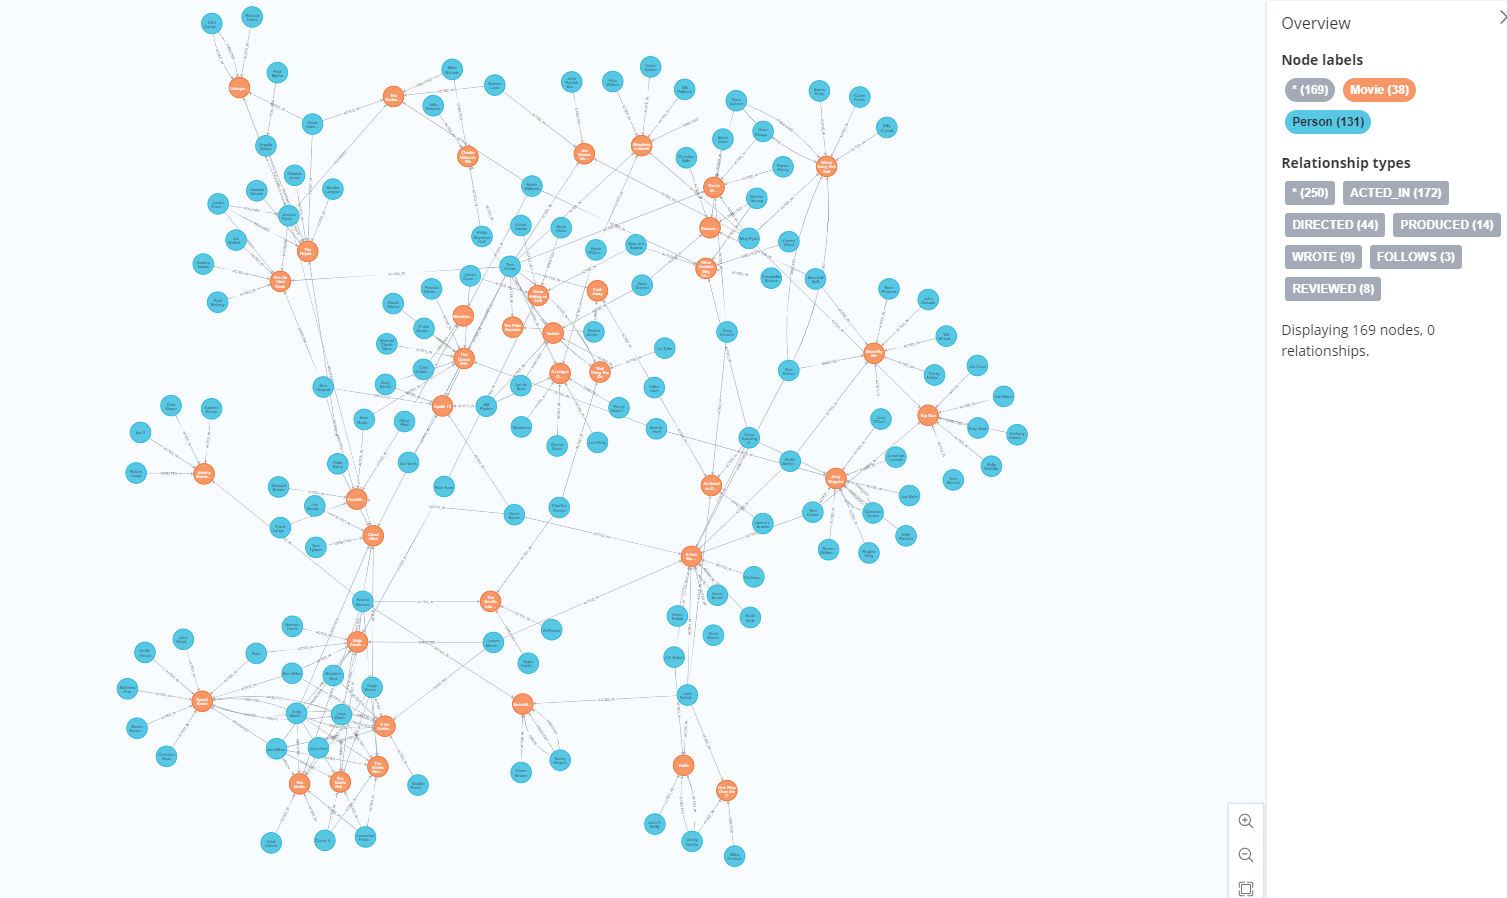

In [10]:
cypher = """
  MATCH (n) 
  RETURN count(n) as total_nodes
  """

result = kg.query(cypher)
result

[{'total_nodes': 169}]

In [11]:
cypher = """
  MATCH (people:Person) 
  RETURN count(people) AS numberOfPeople
  """

result = kg.query(cypher)
result

[{'numberOfPeople': 131}]

In [12]:
cypher = """
   MATCH (cloudAtlas:Movie {title:"Cloud Atlas"}) 
  RETURN cloudAtlas.released, cloudAtlas.tagline
  """

result = kg.query(cypher)
result

[{'cloudAtlas.released': 2012,
  'cloudAtlas.tagline': 'Everything is connected'}]

In [14]:
cypher = """
  MATCH (nineties:Movie) 
  WHERE nineties.released >= 1990 
    AND nineties.released < 2000 
    AND nineties.title STARTS WITH 'A'
  RETURN nineties.title
  """

result = kg.query(cypher)
result

[{'nineties.title': 'A Few Good Men'},
 {'nineties.title': 'As Good as It Gets'},
 {'nineties.title': 'Apollo 13'},
 {'nineties.title': 'A League of Their Own'}]

In [15]:
cypher = """
   MATCH (actor:Person)-[:ACTED_IN]->(movie:Movie) 
  RETURN actor.name, movie.title LIMIT 10

  """

result = kg.query(cypher)
result

[{'actor.name': 'Emil Eifrem', 'movie.title': 'The Matrix'},
 {'actor.name': 'Hugo Weaving', 'movie.title': 'The Matrix'},
 {'actor.name': 'Laurence Fishburne', 'movie.title': 'The Matrix'},
 {'actor.name': 'Carrie-Anne Moss', 'movie.title': 'The Matrix'},
 {'actor.name': 'Keanu Reeves', 'movie.title': 'The Matrix'},
 {'actor.name': 'Hugo Weaving', 'movie.title': 'The Matrix Reloaded'},
 {'actor.name': 'Laurence Fishburne', 'movie.title': 'The Matrix Reloaded'},
 {'actor.name': 'Carrie-Anne Moss', 'movie.title': 'The Matrix Reloaded'},
 {'actor.name': 'Keanu Reeves', 'movie.title': 'The Matrix Reloaded'},
 {'actor.name': 'Hugo Weaving', 'movie.title': 'The Matrix Revolutions'}]

In [16]:
cypher = """
  MATCH (tom:Person {name:"Tom Hanks"})-[:ACTED_IN]->(m)<-[:ACTED_IN]-(coActors) 
  RETURN coActors.name, m.title
  """
kg.query(cypher)

[{'coActors.name': 'Parker Posey', 'm.title': "You've Got Mail"},
 {'coActors.name': 'Greg Kinnear', 'm.title': "You've Got Mail"},
 {'coActors.name': 'Meg Ryan', 'm.title': "You've Got Mail"},
 {'coActors.name': 'Steve Zahn', 'm.title': "You've Got Mail"},
 {'coActors.name': 'Dave Chappelle', 'm.title': "You've Got Mail"},
 {'coActors.name': 'Ed Harris', 'm.title': 'Apollo 13'},
 {'coActors.name': 'Kevin Bacon', 'm.title': 'Apollo 13'},
 {'coActors.name': 'Gary Sinise', 'm.title': 'Apollo 13'},
 {'coActors.name': 'Bill Paxton', 'm.title': 'Apollo 13'},
 {'coActors.name': 'Nathan Lane', 'm.title': 'Joe Versus the Volcano'},
 {'coActors.name': 'Meg Ryan', 'm.title': 'Joe Versus the Volcano'},
 {'coActors.name': 'Liv Tyler', 'm.title': 'That Thing You Do'},
 {'coActors.name': 'Charlize Theron', 'm.title': 'That Thing You Do'},
 {'coActors.name': 'Jim Broadbent', 'm.title': 'Cloud Atlas'},
 {'coActors.name': 'Halle Berry', 'm.title': 'Cloud Atlas'},
 {'coActors.name': 'Hugo Weaving', 'm.t

### Create

In [17]:
cypher = """
CREATE (ad:Person {name:"Arch"})
RETURN ad
"""

kg.query(cypher)

[{'ad': {'name': 'Arch'}}]

In [18]:
# this creates a new movie node as well

cypher = """
MATCH (ad:Person {name:"Arch"})
MERGE (ad)-[actedIn:ACTED_IN]->(movie:Movie {title:"You've Got Mail"}) 
RETURN ad, actedIn, movie
"""
kg.query(cypher)

[{'ad': {'name': 'Arch'},
  'actedIn': ({'name': 'Arch'}, 'ACTED_IN', {'title': "You've Got Mail"}),
  'movie': {'title': "You've Got Mail"}}]

In [19]:
cypher = """
  MATCH (tom:Person {name:"Tom Hanks"})-[:ACTED_IN]->(m)<-[:ACTED_IN]-(coActors) 
  WHERE m.title = "You've Got Mail"
  RETURN coActors.name, m.title
  """
kg.query(cypher)

[{'coActors.name': 'Parker Posey', 'm.title': "You've Got Mail"},
 {'coActors.name': 'Greg Kinnear', 'm.title': "You've Got Mail"},
 {'coActors.name': 'Meg Ryan', 'm.title': "You've Got Mail"},
 {'coActors.name': 'Steve Zahn', 'm.title': "You've Got Mail"},
 {'coActors.name': 'Dave Chappelle', 'm.title': "You've Got Mail"}]

In [23]:
cypher = """
MATCH (movie:Movie {title:"You've Got Mail"})-[:ACTED_IN]-(actor:Person)
WITH movie, COUNT(actor) AS actorsCount
WHERE actorsCount = 1
DETACH DELETE movie
"""
kg.query(cypher)


[]

In [21]:
cypher = """
MATCH (ad:Person {name:"Arch"})
MATCH (movie:Movie {title:"You've Got Mail"})
MERGE (ad)-[actedIn:ACTED_IN]->(movie)
RETURN ad, actedIn, movie
"""
kg.query(cypher)

[{'ad': {'name': 'Arch'},
  'actedIn': ({'name': 'Arch'},
   'ACTED_IN',
   {'tagline': 'At odds in life... in love on-line.',
    'title': "You've Got Mail",
    'released': 1998}),
  'movie': {'tagline': 'At odds in life... in love on-line.',
   'title': "You've Got Mail",
   'released': 1998}},
 {'ad': {'name': 'Arch'},
  'actedIn': ({'name': 'Arch'}, 'ACTED_IN', {'title': "You've Got Mail"}),
  'movie': {'title': "You've Got Mail"}}]

In [24]:
cypher = """
  MATCH (ad:Person {name:"Arch"})-[:ACTED_IN]->(m) 
  RETURN ad, m
  """
kg.query(cypher)

[{'ad': {'name': 'Arch'},
  'm': {'tagline': 'At odds in life... in love on-line.',
   'title': "You've Got Mail",
   'released': 1998}}]

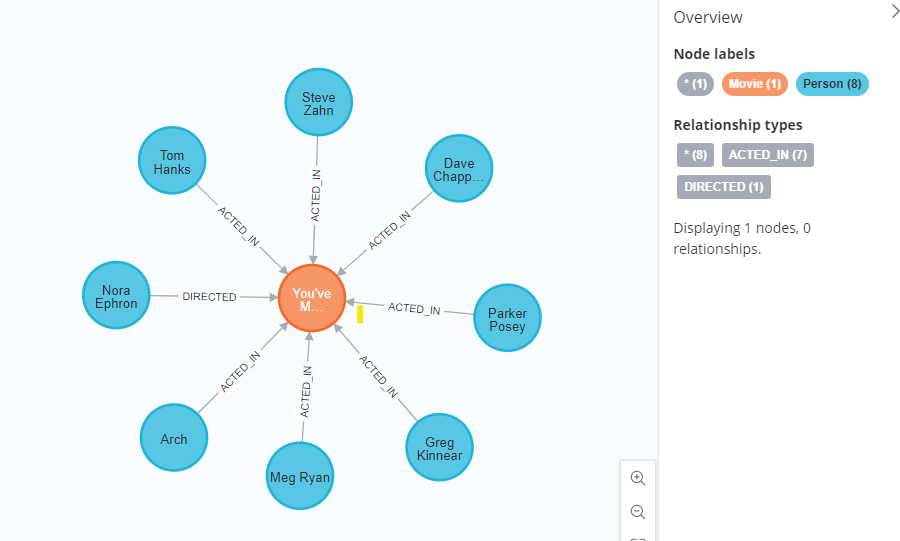